TEST CASE: We will be using the 'Rain in Australia dataset' which contains about 10 years of daily weather observations from numerous Australian weather stations. The task is to create a model that uses todays weather data for a given location to predict wether it will rain at the location tomorrow.

In [5]:
import opendatasets as od
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [8]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [9]:
aus_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [10]:
aus_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [11]:
aus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
aus_df.dropna(subset=['RainTomorrow'], inplace = True)

In [13]:
aus_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [14]:
import plotly.express as px

In [15]:
px.histogram(aus_df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

In [16]:
px.scatter(aus_df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/decision-trees-and-random-forests" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mujtabakhurram2/decision-trees-and-random-forests


'https://jovian.ai/mujtabakhurram2/decision-trees-and-random-forests'

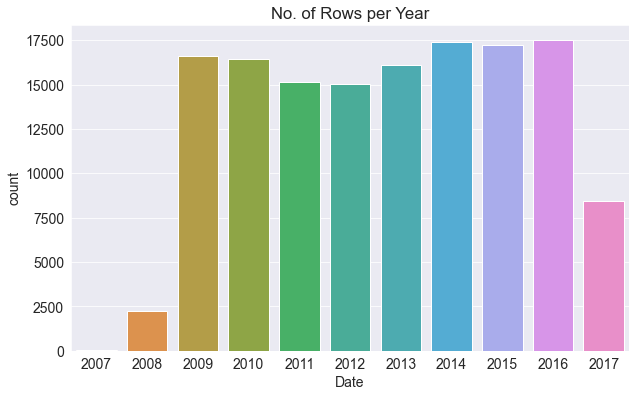

In [18]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(aus_df.Date).dt.year);

In [19]:
def impute_nan_create_category(DataFrame, ColName):
     DataFrame[ColName]= np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])

In [20]:
for Columns in ['WindGustDir','WindDir9am','WindDir3pm','RainToday']:
    impute_nan_create_category(aus_df,Columns)

In [21]:
year = pd.to_datetime(aus_df.Date).dt.year

train_df = aus_df[year < 2015]
val_df = aus_df[year == 2015]
test_df = aus_df[year > 2015]

In [22]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


In [23]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [24]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [25]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [26]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [27]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [28]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [29]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [30]:
aus_df.corr().abs()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736267  0.104255     0.467261  0.072961   
MaxTemp        0.736267  1.000000  0.074839     0.588915  0.469967   
Rainfall       0.104255  0.074839  1.000000     0.064549  0.227525   
Evaporation    0.467261  0.588915  0.064549     1.000000  0.366607   
Sunshine       0.072961  0.469967  0.227525     0.366607  1.000000   
WindGustSpeed  0.177285  0.067690  0.133497     0.203001  0.032831   
WindSpeed9am   0.176005  0.014680  0.086816     0.193936  0.008040   
WindSpeed3pm   0.175749  0.050800  0.057759     0.128895  0.056012   
Humidity9am    0.234211  0.505432  0.223725     0.505890  0.491603   
Humidity3pm    0.005999  0.509270  0.255312     0.392785  0.629122   
Pressure9am    0.451260  0.332293  0.168085     0.269907  0.040959   
Pressure3pm    0.461623  0.427279  0.126728     0.293160  0.020464   
Cloud9am       0.077625  0.289865  0.198195     0.185032  0.675610   
Cloud3pm       0.020489  0.279053  0.171993     0.184287  0.704202   
Temp9am        0.901813  0.887020  0.011477     0.545497  0.291139   
Temp3pm        0.708865  0.984562  0.079178     0.574275  0.490180   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177285      0.176005      0.175749     0.234211   
MaxTemp             0.067690      0.014680      0.050800     0.505432   
Rainfall            0.133497      0.086816      0.057759     0.223725   
Evaporation         0.203001      0.193936      0.128895     0.505890   
Sunshine            0.032831      0.008040      0.056012     0.491603   
WindGustSpeed       1.000000      0.604837      0.686419     0.215461   
WindSpeed9am        0.604837      1.000000      0.519971     0.270807   
WindSpeed3pm        0.686419      0.519971      1.000000     0.145942   
Humidity9am         0.215461      0.270807      0.145942     1.000000   
Humidity3pm         0.026663      0.031607      0.015903     0.667388   
Pressure9am         0.457891      0.227923      0.295567     0.139519   
Pressure3pm         0.412922      0.174916      0.254988     0.186955   
Cloud9am            0.071235      0.024280      0.052780     0.452182   
Cloud3pm            0.109088      0.053584      0.025269     0.358043   
Temp9am             0.150258      0.129298      0.163601     0.472826   
Temp3pm             0.032970      0.005108      0.028567     0.499777   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.005999     0.451260     0.461623  0.077625  0.020489   
MaxTemp           0.509270     0.332293     0.427279  0.289865  0.279053   
Rainfall          0.255312     0.168085     0.126728  0.198195  0.171993   
Evaporation       0.392785     0.269907     0.293160  0.185032  0.184287   
Sunshine          0.629122     0.040959     0.020464  0.675610  0.704202   
WindGustSpeed     0.026663     0.457891     0.412922  0.071235  0.109088   
WindSpeed9am      0.031607     0.227923     0.174916  0.024280  0.053584   
WindSpeed3pm      0.015903     0.295567     0.254988  0.052780  0.025269   
Humidity9am       0.667388     0.139519     0.186955  0.452182  0.358043   
Humidity3pm       1.000000     0.027449     0.051840  0.517037  0.523270   
Pressure9am       0.027449     1.000000     0.961348  0.130081  0.148139   
Pressure3pm       0.051840     0.961348     1.000000  0.061152  0.084963   
Cloud9am          0.517037     0.130081     0.061152  1.000000  0.604118   
Cloud3pm          0.523270     0.148139     0.084963  0.604118  1.000000   
Temp9am           0.221467     0.422773     0.470325  0.137843  0.127869   
Temp3pm           0.557989     0.287301     0.389863  0.302520  0.318254   

                Temp9am   Temp3pm  
MinTemp        0.901813  0.708865  
MaxTemp        0.887020  0.984562  
Rainfall       0.011477  0.079178  
Evaporation    0.545497  0.574275  
Sunshine       0.291139  0.490180  
WindGustSpeed  0.150258  0.032970  
WindSpeed9am   0.129298  0.005108  
Wi

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imputer = SimpleImputer(strategy = 'mean').fit(aus_df[numeric_cols])

In [33]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [34]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler().fit(aus_df[numeric_cols])

In [37]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [38]:
val_inputs.describe().loc[['min', 'max']]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min  0.007075  0.030246  0.000000     0.000000       0.0       0.007752   
max  0.952830  0.948960  0.666307     0.485517       1.0       1.000000   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min      0.000000      0.000000         0.04          0.0     0.125620   
max      0.669231      0.850575         1.00          1.0     0.971901   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
min       0.0816  0.000000  0.000000  0.021097  0.026871  
max       0.9632  0.888889  0.888889  0.943038  0.925144

In [39]:
train_inputs[categorical_cols].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(aus_df[categorical_cols])

In [42]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [43]:
train_inputs = pd.concat([train_inputs,pd.DataFrame(columns=encoded_cols)])
val_inputs = pd.concat([val_inputs,pd.DataFrame(columns=encoded_cols)])
test_inputs = pd.concat([test_inputs,pd.DataFrame(columns=encoded_cols)])

In [44]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [45]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [46]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [47]:
X_test

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498    0.681604  0.801512  0.000000     0.037723  0.525852       0.372093   
2499    0.693396  0.725898  0.001078     0.037723  0.525852       0.341085   
2500    0.634434  0.527410  0.005930     0.037723  0.525852       0.325581   
2501    0.608491  0.538752  0.042049     0.037723  0.525852       0.255814   
2502    0.566038  0.523629  0.018329     0.037723  0.525852       0.193798   
...          ...       ...       ...          ...       ...            ...   
145454  0.283019  0.502836  0.000000     0.037723  0.525852       0.193798   
145455  0.266509  0.533081  0.000000     0.037723  0.525852       0.193798   
145456  0.285377  0.568998  0.000000     0.037723  0.525852       0.124031   
145457  0.327830  0.599244  0.000000     0.037723  0.525852       0.240310   
145458  0.384434  0.601134  0.000000     0.037723  0.525852       0.170543   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498        0.000000      0.080460         0.46         0.17     0.543802   
2499        0.069231      0.195402         0.54         0.30     0.505785   
2500        0.084615      0.448276         0.62         0.67     0.553719   
2501        0.069231      0.195402         0.74         0.65     0.618182   
2502        0.046154      0.103448         0.92         0.63     0.591736   
...              ...           ...          ...          ...          ...   
145454      0.115385      0.149425         0.59         0.27     0.730579   
145455      0.100000      0.126437         0.51         0.24     0.728926   
145456      0.100000      0.103448         0.56         0.21     0.710744   
145457      0.069231      0.103448         0.53         0.24     0.669421   
145458      0.100000      0.080460         0.51         0.24     0.642975   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
2498         0.5136  0.777778  0.333333  0.702532  0.808061   
2499         0.5008  0.888889  0.888889  0.675105  0.712092   
2500         0.6032  0.888889  0.888889  0.611814  0.477927   
2501         0.6304  0.888889  0.888889  0.556962  0.518234   
2502         0.5888  0.888889  0.888889  0.514768  0.529750   
...             ...       ...       ...       ...       ...   
145454       0.7056  0.493021  0.500352  0.350211  0.504798   
145455       0.6912  0.493021  0.500352  0.364979  0.533589   
145456       0.6720  0.493021  0.500352  0.381857  0.573896   
145457       0.6352  0.493021  0.500352  0.415612  0.604607   
145458       0.6304  0.333333  0.222222  0.470464  0.602687   

        Location_Adelaide  Location_Albany  Location_Albury  \
2498                  0.0              0.0              1.0   
2499                  0.0              0.0              1.0   
2500                  0.0              0.0              1.0   
2501                  0.0              0.0              1.0   
2502                  0.0              0.0              1.0   
...                   ...              ...              ...   
145454                0.0              0.0              0.0   
145455                0.0              0.0              0.0   
145456                0.0              0.0              0.0   
145457                0.0              0.0              0.0   
145458                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
2498                      0.0                     0.0                0.0   
2499                      0.0                     0.0                0.0   
2500                      0.0                     0.0                0.0   
2501                      0.0                     0.0                0.0   
2502                      0.0                     0.0                0.0   
...                       ...                     ...                ...   
145454                    0.0                     0.0                0.0   
145455                   

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/decision-trees-and-random-forests" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mujtabakhurram2/decision-trees-and-random-forests


'https://jovian.ai/mujtabakhurram2/decision-trees-and-random-forests'

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier(random_state=42)

In [51]:
%%time
model.fit(X_train, train_targets)

CPU times: user 2.51 s, sys: 44.1 ms, total: 2.55 s
Wall time: 2.61 s


DecisionTreeClassifier(random_state=42)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
train_preds = model.predict(X_train)

In [54]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [55]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

In [56]:
train_probs = model.predict_proba(X_train)

In [57]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [58]:
accuracy_score(train_targets, train_preds)

0.9999797955307714

In [59]:
model.score(X_val, val_targets)

0.7928152747954268

In [60]:
val_targets.value_counts()/ len(val_targets)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

In [61]:
from sklearn.tree import plot_tree, export_text

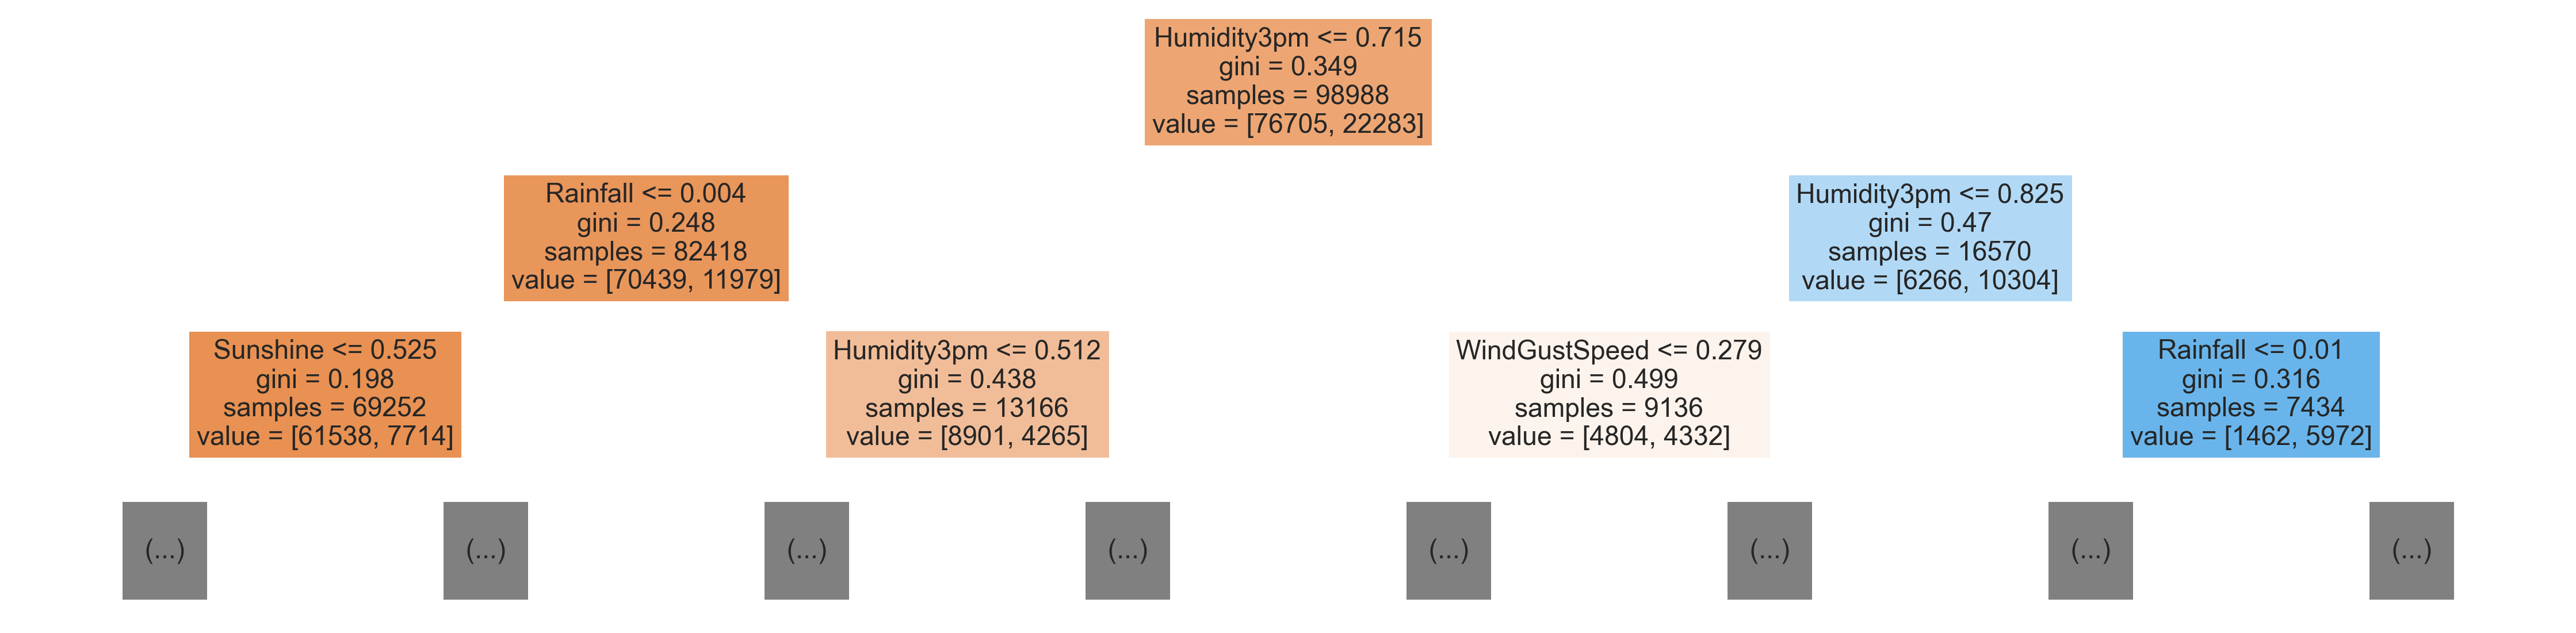

In [62]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names = X_train.columns, max_depth=2, filled=True);

In [63]:
model.tree_.max_depth

48

In [64]:
tree_text = export_text(model, max_depth = 10, feature_names = list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am <= 0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am >  0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [65]:
model.feature_importances_

array([3.43949832e-02, 3.20723744e-02, 5.96978427e-02, 2.39997157e-02,
       4.96970278e-02, 5.52776844e-02, 2.77290154e-02, 2.87896517e-02,
       3.97762378e-02, 2.61665505e-01, 3.38797443e-02, 6.29086081e-02,
       1.41634157e-02, 1.82574107e-02, 3.39304134e-02, 2.99978180e-02,
       2.29983521e-03, 1.97127428e-03, 1.30448300e-03, 7.05458133e-04,
       1.51355792e-03, 1.12862805e-03, 8.66864394e-04, 1.77451768e-03,
       1.21677026e-03, 1.57331930e-03, 8.42954495e-04, 2.05031388e-03,
       1.90637772e-03, 3.26731137e-04, 1.11629763e-03, 1.52431517e-03,
       5.08479231e-04, 8.30004101e-04, 1.48248394e-03, 8.87667861e-04,
       7.61612213e-04, 7.02994607e-04, 1.72668316e-03, 2.07806756e-03,
       3.80229195e-04, 7.64016199e-04, 1.38715756e-03, 1.47491895e-03,
       1.48825382e-03, 8.67028594e-04, 8.33784178e-04, 1.54580309e-03,
       1.09367536e-03, 2.03218887e-03, 8.51581460e-04, 1.79979059e-03,
       9.69639078e-04, 1.28254100e-03, 1.28721925e-03, 3.77018000e-04,
      

In [66]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [67]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.261666
11    Pressure3pm    0.062909
2        Rainfall    0.059698
5   WindGustSpeed    0.055278
4        Sunshine    0.049697
8     Humidity9am    0.039776
0         MinTemp    0.034395
14        Temp9am    0.033930
10    Pressure9am    0.033880
1         MaxTemp    0.032072

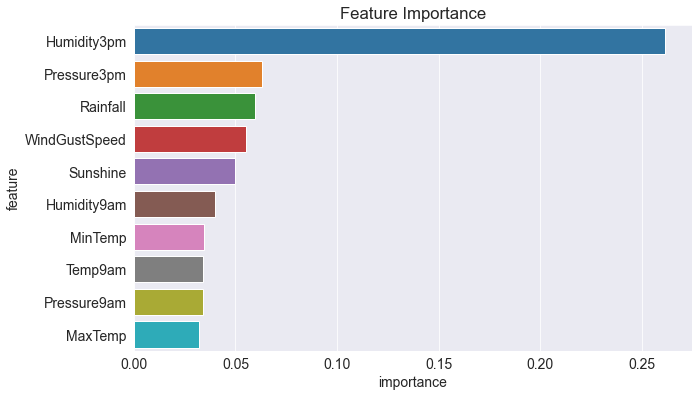

In [68]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [69]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/decision-trees-and-random-forests" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mujtabakhurram2/decision-trees-and-random-forests


'https://jovian.ai/mujtabakhurram2/decision-trees-and-random-forests'

## Dealing with overfitting

In [70]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [71]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [72]:
model.score(X_train,train_targets)

0.8291308037337859

In [73]:
model.score(X_val, val_targets)

0.8334397307178921

In [74]:
model.classes_

array(['No', 'Yes'], dtype=object)

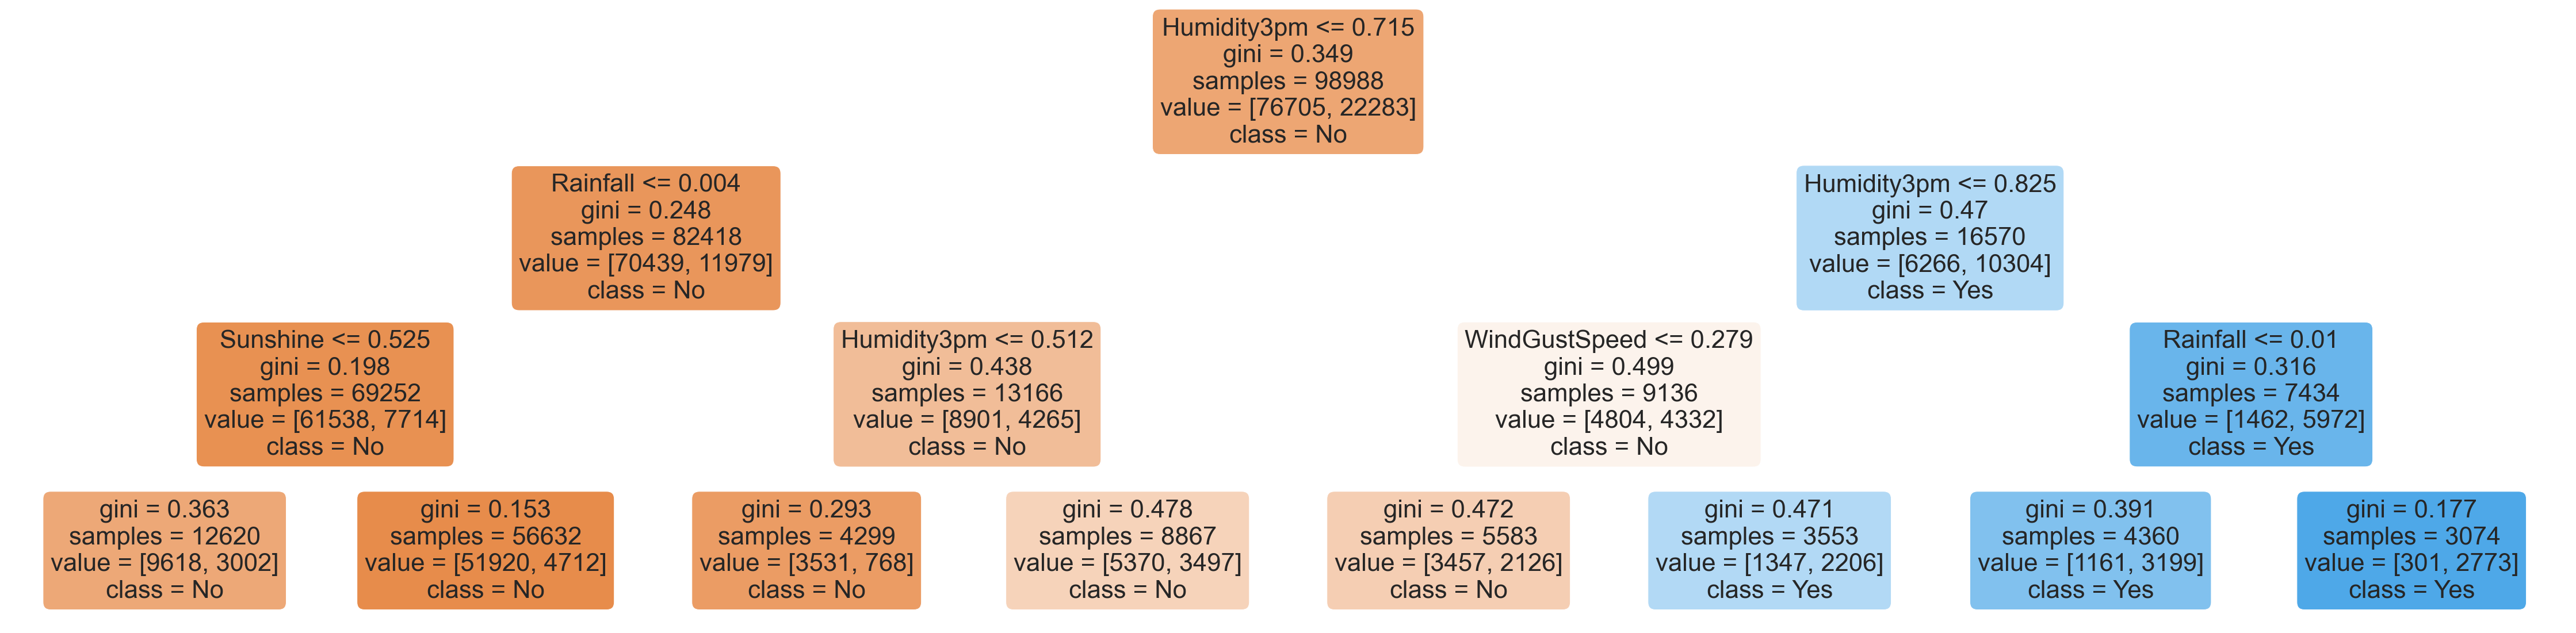

In [75]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [76]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [77]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [78]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 30.5 s, sys: 350 ms, total: 30.8 s
Wall time: 31.3 s


In [79]:
errors_df

Max Depth  Training Error  Validation Error
0           1        0.184315          0.177935
1           2        0.179547          0.172712
2           3        0.170869          0.166560
3           4        0.165707          0.164355
4           5        0.160676          0.159074
5           6        0.156271          0.157275
6           7        0.153312          0.154605
7           8        0.147806          0.157739
8           9        0.140916          0.156578
9          10        0.132966          0.157565
10         11        0.123247          0.159248
11         12        0.113448          0.161221
12         13        0.101861          0.165400
13         14        0.090021          0.166270
14         15        0.078969          0.172538
15         16        0.068291          0.175207
16         17        0.058381          0.176716
17         18        0.048713          0.181591
18         19        0.039914          0.186524
19         20        0.032226          0.188091

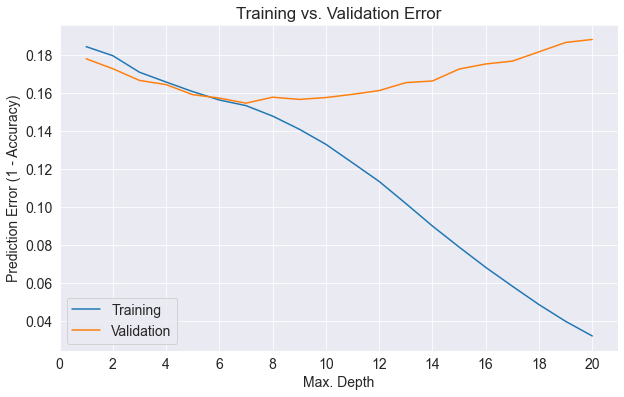

In [80]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [81]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8453949277465034

In [82]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [83]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [84]:
model.score(X_train, train_targets)

0.8480421869317493

In [85]:
model.score(X_val, val_targets)

0.8442342290058615

In [86]:
model.tree_.max_depth

12

In [87]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

In [88]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/decision-trees-and-random-forests" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mujtabakhurram2/decision-trees-and-random-forests


'https://jovian.ai/mujtabakhurram2/decision-trees-and-random-forests'

## Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
model = RandomForestClassifier(n_jobs = -1, random_state = 42)

In [91]:
%%time
model.fit(X_train, train_targets)

CPU times: user 29 s, sys: 542 ms, total: 29.6 s
Wall time: 5.6 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [92]:
model.score(X_train, train_targets)

0.9999595910615429

In [93]:
model.score(X_val, val_targets)

0.8559572862863444

In [94]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.9 , 0.1 ],
       [0.97, 0.03],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [95]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

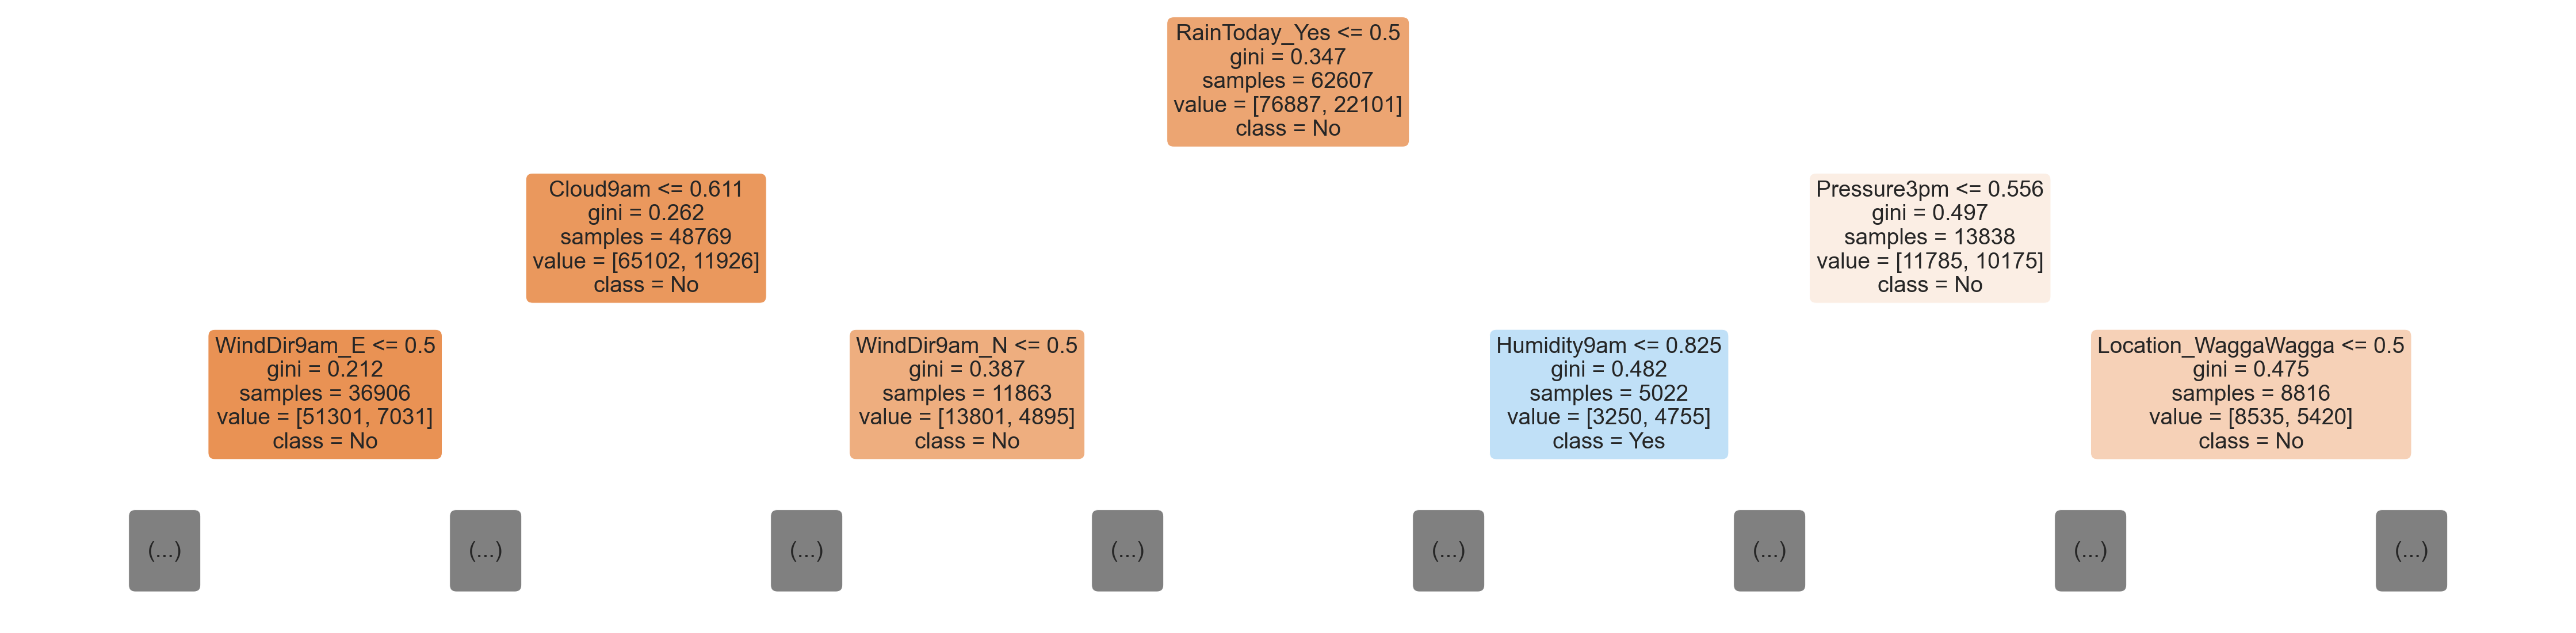

In [96]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

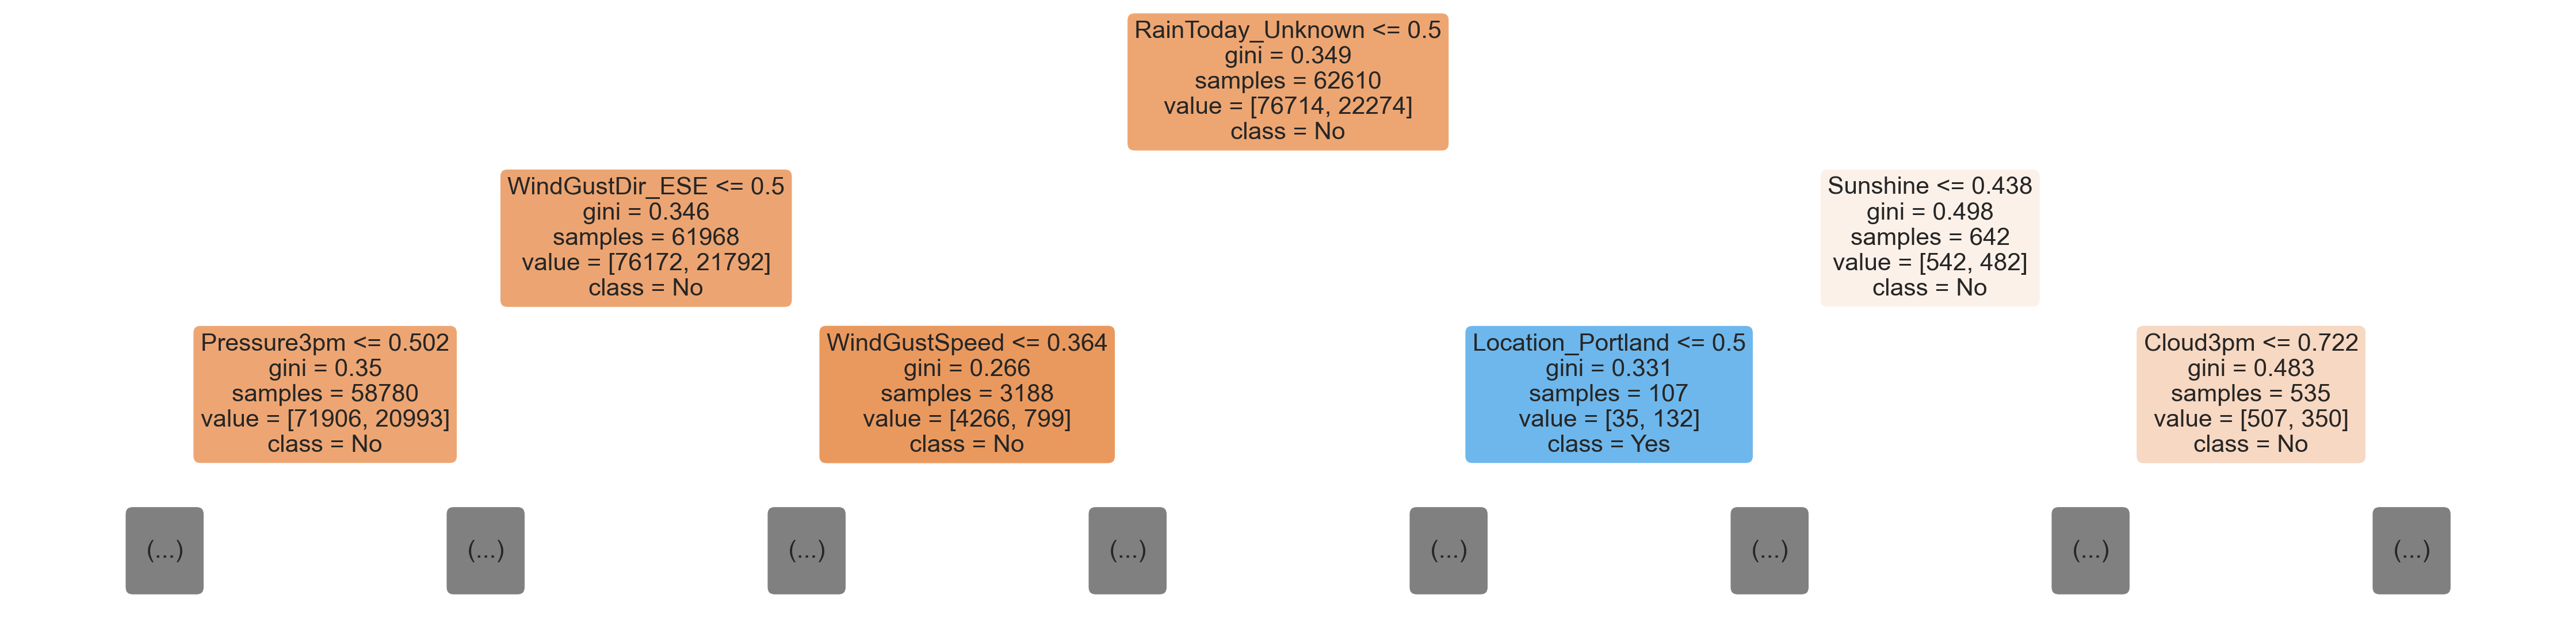

In [97]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [98]:
len(model.estimators_)

100

In [99]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [100]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.133176
4        Sunshine    0.055553
11    Pressure3pm    0.052976
2        Rainfall    0.050488
10    Pressure9am    0.049379
8     Humidity9am    0.049261
5   WindGustSpeed    0.046640
15        Temp3pm    0.045179
1         MaxTemp    0.042172
0         MinTemp    0.041549

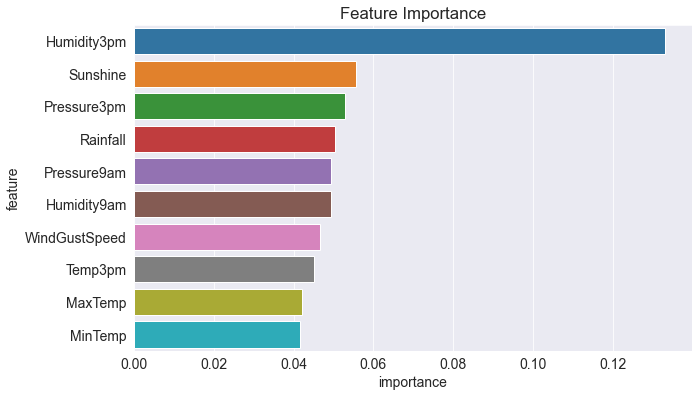

In [101]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [102]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/decision-trees-and-random-forests" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mujtabakhurram2/decision-trees-and-random-forests


'https://jovian.ai/mujtabakhurram2/decision-trees-and-random-forests'

In [103]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [104]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [105]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999595910615429, 0.8559572862863444)

In [106]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [107]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [108]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9873520022629005, 0.8441761940688295)

In [109]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [110]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [111]:
model.score(X_train, train_targets)

0.9999797955307714

In [112]:
model.score(X_val, val_targets)

0.8572920898380825

In [113]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [114]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [115]:
test_params(max_depth=5)

(0.821847092576878, 0.8262433985259126)

In [116]:
test_params(max_depth=26)

(0.9820685335596234, 0.857001915152922)

In [117]:
test_params(max_leaf_nodes=2**5)

(0.8307572635066877, 0.8324531367883465)

In [118]:
test_params(max_leaf_nodes=2**20)

(0.9999494888269285, 0.8565376356566653)

In [119]:
base_accs # no max depth or max leaf nodes

(0.9999595910615429, 0.8559572862863444)

In [120]:
test_params(max_features='log2')

(0.9999595910615429, 0.8540421333642852)

In [121]:
test_params(max_features=3)

(0.9999595910615429, 0.8528814346236434)

In [122]:
test_params(max_features=6)

(0.9999595910615429, 0.8540421333642852)

In [123]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [124]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9626419363963309, 0.8556671116011839)

In [125]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8501131450276801, 0.8455109976205676)

In [126]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [127]:
test_params(min_impurity_decrease=1e-7)

(0.9996363195538853, 0.8558992513493123)

In [128]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [129]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [130]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8558992513493123)

In [131]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [132]:
test_params(max_samples=0.9)

(0.9997575463692568, 0.8565956705936975)

In [133]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [134]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [135]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.852591259938483)

In [136]:
test_params(class_weight={'No': 1, 'Yes': 2})

(0.9999292843576999, 0.8565376356566653)

In [137]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [138]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [139]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [140]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9920293368893199, 0.8561894260344728)

In [141]:
base_accs

(0.9999595910615429, 0.8559572862863444)

In [143]:
aus_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145454       NaN           E           31.0        ESE          E   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145454       1021.2       NaN       NaN      9.4     20.9        No   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145454           No  
145455           No  
145456           No  
145457           No  
145458           No  

[142193 rows x 23 columns]

In [144]:
model.score(X_test, test_targets)

0.8453838453838454

In [145]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/decision-trees-and-random-forests" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mujtabakhurram2/decision-trees-and-random-forests


'https://jovian.ai/mujtabakhurram2/decision-trees-and-random-forests'

In [149]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df = pd.concat([input_df,pd.DataFrame(columns=encoded_cols)])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [150]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [151]:
predict_input(model, new_input)

('Yes', 0.7963843244221757)

In [152]:
aus_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [153]:
import joblib

In [154]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [155]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [156]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [157]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8453838453838454

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/decision-trees-and-random-forests" on https://jovian.ai/
